In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df=pd.read_csv("house_price_dataset.csv")
df.head()


,Area Size,Num Bedrooms,Num Bathrooms,Location,Condition,House Price
0,3532,4,1,Rural,Excellent,186840
1,3407,5,3,Rural,Excellent,180660
2,2453,4,1,Suburban,Fair,123090
3,4064,2,3,Suburban,Good,208620
4,1833,5,2,Suburban,Excellent,102140


In [8]:
df.tail()

,Area Size,Num Bedrooms,Num Bathrooms,Location,Condition,House Price
195,1223,2,3,Rural,Fair,61370
196,4423,2,1,Suburban,Good,226530
197,4534,5,2,Urban,Good,232390
198,4286,4,2,Urban,Good,219960
199,4529,3,3,Suburban,Good,231900


In [9]:
df.shape

(200, 6)

In [44]:
df['Area Size'].skew()

-0.06349210139651218

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Area Size      200 non-null    int64 
 1   Num Bedrooms   200 non-null    int64 
 2   Num Bathrooms  200 non-null    int64 
 3   Location       200 non-null    object
 4   Condition      200 non-null    object
 5   House Price    200 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 9.5+ KB


In [14]:
df.describe(include='all')

,Area Size,Num Bedrooms,Num Bathrooms,Location,Condition,House Price
count,200.00000,200.000,200.000000,200,200,200.00000
unique,NaN,NaN,NaN,3,3,NaN
top,NaN,NaN,NaN,Rural,Good,NaN
freq,NaN,NaN,NaN,72,73,NaN
mean,2895.77500,3.420,2.055000,NaN,NaN,150100.45000
std,1168.14835,1.149,0.809476,NaN,NaN,58412.32087
min,824.00000,2.000,1.000000,NaN,NaN,41510.00000
25%,1918.25000,2.000,1.000000,NaN,NaN,101867.50000
50%,2976.00000,3.000,2.000000,NaN,NaN,151515.00000
75%,3759.00000,4.000,3.000000,NaN,NaN,195492.50000


In [16]:
df.isna().sum()

Area Size        0
Num Bedrooms     0
Num Bathrooms    0
Location         0
Condition        0
House Price      0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


<ipython-input-38-4c7902fd49bd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Location', y='House Price', data=df, palette='viridis')


Text(0.5, 1.0, 'Location vs. House Price')

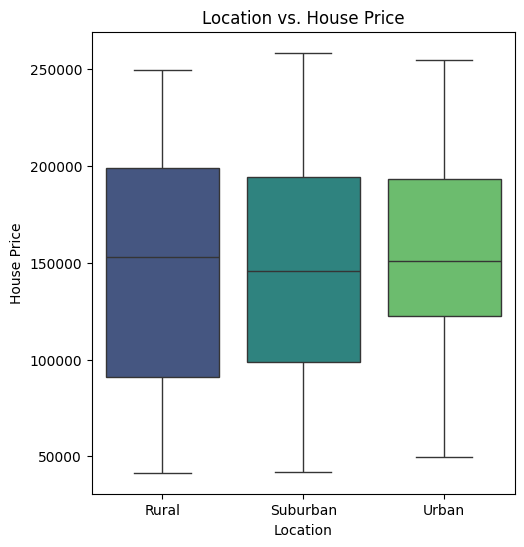

In [38]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Location', y='House Price', data=df, palette='viridis')
plt.title('Location vs. House Price')


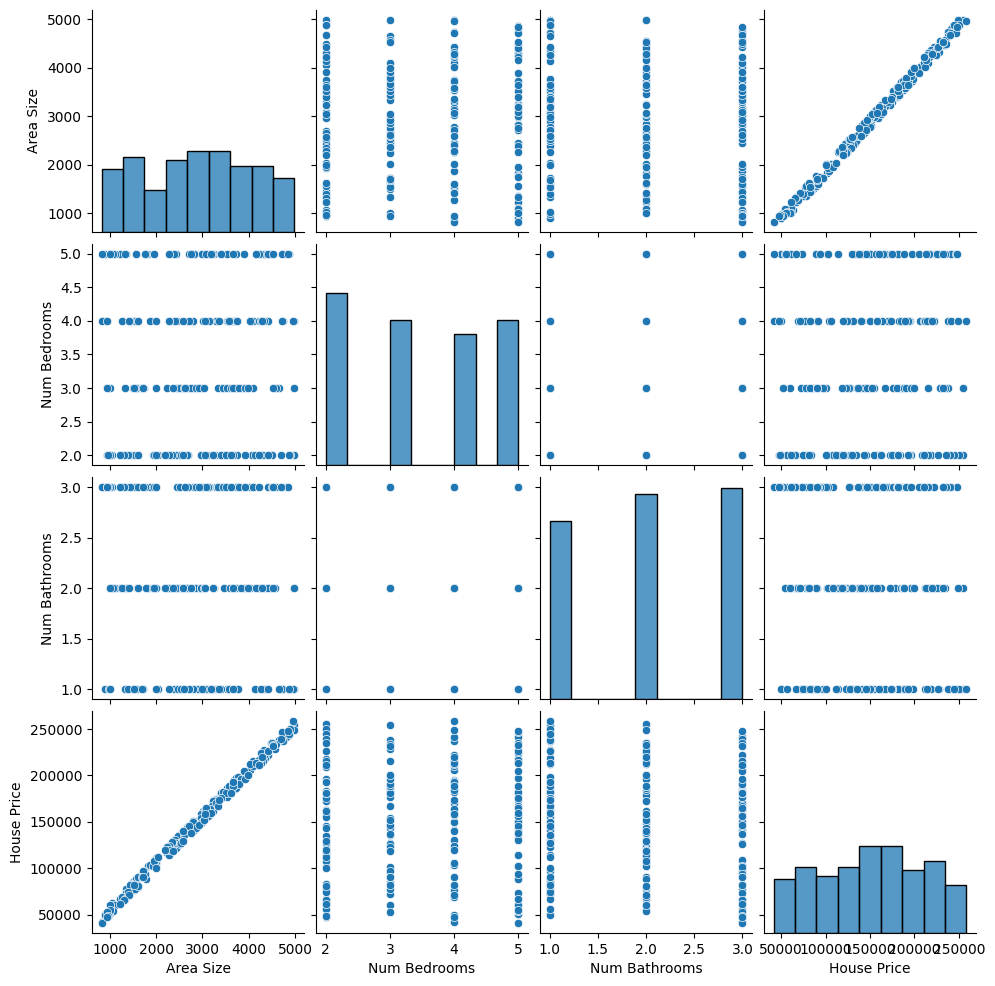

In [39]:
sns.pairplot(df[['Area Size', 'Num Bedrooms', 'Num Bathrooms', 'House Price']])
plt.show()


<ipython-input-40-1a774f15af74>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition', y='House Price', data=df, palette='viridis')


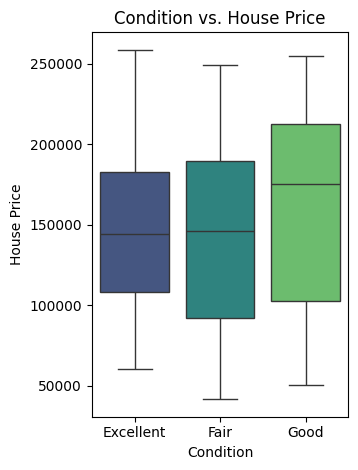

In [40]:

plt.subplot(1, 2, 2)
sns.boxplot(x='Condition', y='House Price', data=df, palette='viridis')
plt.title('Condition vs. House Price')

plt.tight_layout()
plt.show()

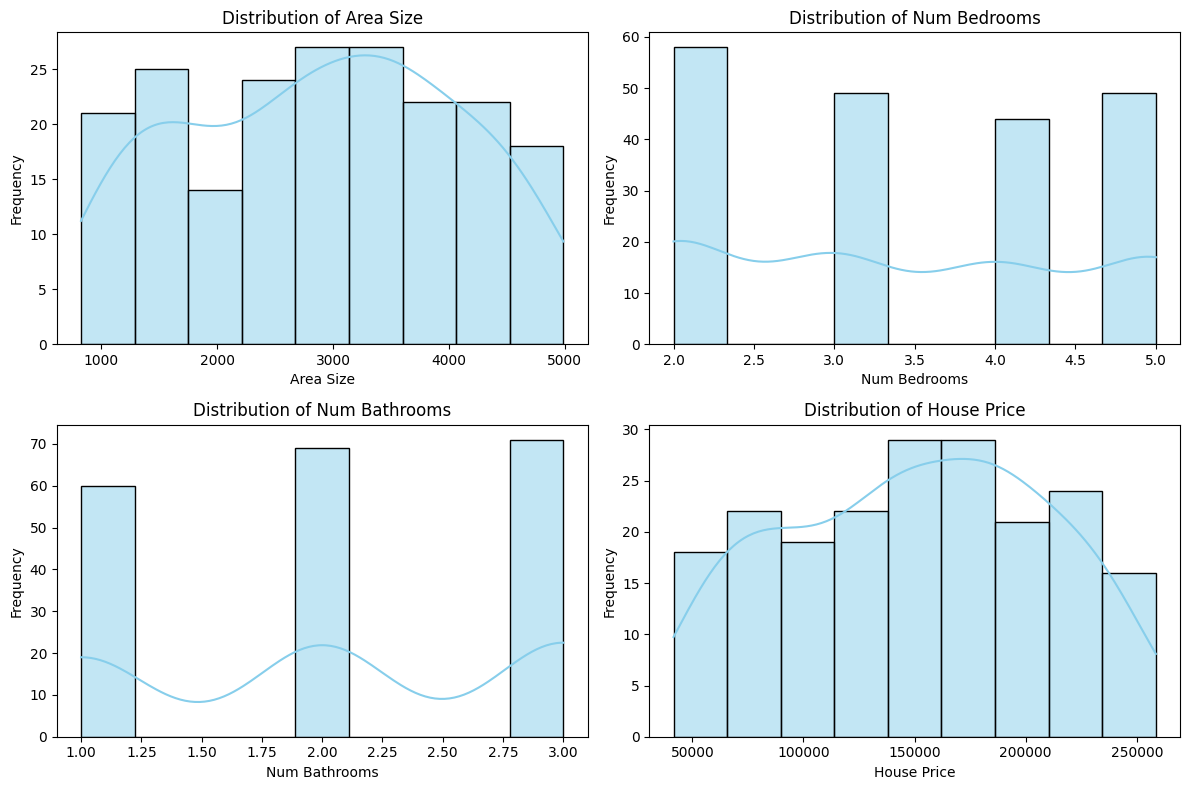

In [41]:
plt.figure(figsize=(12, 8))

# Plot histograms
for i, col in enumerate(['Area Size', 'Num Bedrooms', 'Num Bathrooms', 'House Price']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

There is a slight left skeweness is there

In [19]:
|from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [22]:
X = df.drop(columns=['House Price'])
y = df['House Price']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.preprocessing import OneHotEncoder


numerical_cols = ['Area Size', 'Num Bedrooms', 'Num Bathrooms']
categorical_cols = ['Location', 'Condition']

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_categorical = encoder.fit_transform(X_train[categorical_cols])
X_test_categorical = encoder.transform(X_test[categorical_cols])


X_train_scaled = np.concatenate([X_train[numerical_cols], X_train_categorical], axis=1)
X_test_scaled = np.concatenate([X_test[numerical_cols], X_test_categorical], axis=1)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
# Combine numerical and one-hot encoded categorical features
X_train_scaled = np.concatenate([X_train[numerical_cols], X_train_categorical], axis=1)
X_test_scaled = np.concatenate([X_test[numerical_cols], X_test_categorical], axis=1)


In [27]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])


In [28]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_split=0.1)


Epoch 1/100
9/9 [==============================] - 1s 37ms/step - loss: 25169389568.0000 - val_loss: 29814607872.0000
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 24989505536.0000 - val_loss: 29597206528.0000
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 24805822464.0000 - val_loss: 29372233728.0000
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 24610473984.0000 - val_loss: 29109395456.0000
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 24368701440.0000 - val_loss: 28790067200.0000
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 24073439232.0000 - val_loss: 28384346112.0000
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 23708116992.0000 - val_loss: 27866972160.0000
Epoch 8/100
9/9 [==============================] - 0s 7ms/step - loss: 23218868224.0000 - val_loss: 27243464704.0000
Epoch 9/100
9/9 [==============================] - 0s 6ms/step 

In [29]:
mse = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error on Test Data:", mse)


2/2 [==============================] - 0s 5ms/step - loss: 18989626.0000
Mean Squared Error on Test Data: 18989626.0


In [30]:
predictions = model.predict(X_test_scaled)


2/2 [==============================] - 0s 4ms/step


In [31]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error on Test Data:", mse)

Mean Squared Error on Test Data: 18989624.06905098


In [45]:
predictions

array([[ 74495.27 ],
       [147117.2  ],
       [ 49323.957],
       [ 83259.4  ],
       [137579.61 ],
       [ 42909.22 ],
       [231271.05 ],
       [202220.   ],
       [118052.734],
       [248338.47 ],
       [ 70548.65 ],
       [ 50200.367],
       [220341.67 ],
       [194393.92 ],
       [205789.31 ],
       [ 48608.125],
       [257012.3  ],
       [105474.54 ],
       [219635.89 ],
       [117467.914],
       [186496.89 ],
       [138032.55 ],
       [251541.67 ],
       [170110.16 ],
       [194002.66 ],
       [243625.36 ],
       [144013.84 ],
       [124360.87 ],
       [ 65777.32 ],
       [222452.94 ],
       [156207.83 ],
       [ 46703.867],
       [179772.8  ],
       [125737.52 ],
       [ 81215.02 ],
       [163871.83 ],
       [252281.14 ],
       [189000.88 ],
       [135580.25 ],
       [ 91782.83 ]], dtype=float32)

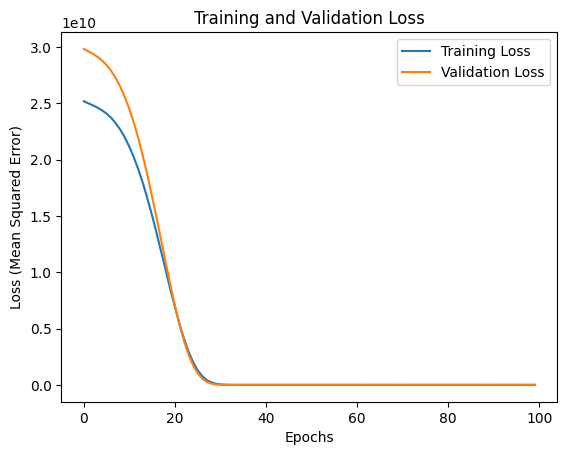

In [46]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()